In [15]:
#imports
import numpy as np
import scipy.optimize as opt
import scipy.signal
from scipy.optimize import curve_fit
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import statistics as stat
%matplotlib inline

In [16]:
#enter data txt file here
def load_data_func(textfile):
    raw_data = np.loadtxt(textfile, delimiter = ",")
    xdata = np.array(raw_data[0:,0])
    ydata = np.array(raw_data[0:,2])
    return xdata, ydata, textfile

In [17]:
#find average values and make a subset of those values that starts with the heater
def average_func(xdata, ydata, number_of_avg_values = 40):
    subset_made = 'false'
    beginning_subset = 0
    avg_values = [0] * number_of_avg_values
    avgdatafit = np.linspace(min(xdata),max(xdata), number_of_avg_values)
    magic_number = int((len(ydata) - 120)/40)
    for i in range(0,40):
        left_bound = (i*magic_number)
        right_bound = (i*magic_number)+40
        avg_values[i] = stat.mean(ydata[left_bound:right_bound])
        if i != 0 and i != 1:
            if np.greater(avg_values[i]-avg_values[i-1], 0.08) and subset_made != 'true':
                beginning_subset = i-1
                subset_made = 'true'  
    avg_values_sub = avg_values[beginning_subset:number_of_avg_values]
    xdatafit = np.linspace(min(xdata),max(xdata),len(avg_values))
    xdatafitsub = np.linspace(xdatafit[beginning_subset],max(xdata),len(avg_values_sub)) 
    return avg_values_sub, xdatafit, beginning_subset, xdatafitsub, avg_values

In [18]:
#fit an exponential function to the average value subset
def fit_func(avg_values_sub, xdatafit, beginning_subset, xdatafitsub):
    def exp_func(t, a, b, c,d):
         return a-b*(np.exp(-((t-d)/c)))
    init_values = [max(avg_values_sub),((max(avg_values_sub)-7)/4)+((max(avg_values_sub)-8)/2),5+((max(avg_values_sub)-7)*3.5),xdatafit[beginning_subset]]
    optimizedParameters, pcov = opt.curve_fit(exp_func, xdatafitsub, avg_values_sub, p0 = init_values)
    return exp_func, init_values, optimizedParameters

In [26]:
#text for graph
def graph_text_func(optimizedParameters,exp_func, xdatafitsub,avg_values_sub):
    temp_rise = optimizedParameters[0]
    temp_rise_text ='Change in Temp = %sK' %((round(temp_rise, 2)))
    k_text = 'ΔT/k = %sK/s' %round((temp_rise/optimizedParameters[2]),3)
    return temp_rise_text, k_text

In [27]:
#plot graph
def graph_func(optimizedParameters,avg_values_sub, xdata, ydata, xdatafitsub, exp_func,textfile):    
    temp_rise = optimizedParameters[0] - exp_func(xdatafitsub,*optimizedParameters)[0]
    temp_rise_text ='Change in Temp = %sK' %((round(temp_rise, 2)))
    k_text = 'ΔT/k = %sK/s' %round((temp_rise/optimizedParameters[2]),3)
    
    ax = plt.gca()
    plt.plot(xdata,ydata)
    plt.plot(xdatafitsub,avg_values_sub, '.')
    plt.plot(xdatafitsub, exp_func(xdatafitsub,*optimizedParameters))
    plt.legend(['Data', 'Average Values', 'Best Fit'], loc='upper left')
    
    plt.xlabel('Time(s)', fontsize = 12)
    plt.ylabel('Temperature(K)', fontsize = 12)
    plt.text(0.5, 0.25,temp_rise_text, fontsize = 10, fontweight='bold', transform=ax.transAxes,
            bbox={'alpha':0.5, 'pad':10})
    plt.text(0.5, 0.1, k_text, fontsize = 10, fontweight='bold', transform=ax.transAxes,
            bbox={'facecolor':'green','alpha':0.5, 'pad':10})
    plt.title('Heater Stabilization at I = %s' %textfile[4:8])
    plt.grid()
    plt.show()

In [28]:
#funcs-in-a-func
def big_func(textfile):
    xdata, ydata, textfile = load_data_func(textfile)
    avg_values_sub, xdatafit, beginning_subset, xdatafitsub, avg_values= average_func(xdata, ydata, number_of_avg_values=40)
    exp_func, init_values,optimizedParameters = fit_func(avg_values_sub, xdatafit, beginning_subset, xdatafitsub)
    temp_rise_text, k_text = graph_text_func(optimizedParameters,avg_values_sub,exp_func, xdatafitsub)
    graph_func(optimizedParameters,avg_values_sub, xdata, ydata, xdatafitsub, exp_func,textfile)

    

In [29]:
#func-ception
def even_bigger_func():
    big_func('New 0.8A Current.txt')
    big_func('New 0.9A Current.txt')
    big_func('New 1.0A Current.txt')
    big_func('New 1.1A Current.txt')
    big_func('New 1.2A Current.txt')
    big_func('New 1.3A Current.txt')
    big_func('New 1.4A Current.txt')
    big_func('New 1.5A Current.txt')
    big_func('New 1.6A Current.txt')
    big_func('New 1.7A Current.txt')
    big_func('New 1.8A Current.txt')

    k_list = [0.029,0.045,0.039,0.056,0.063,0.063,0.080,0.092,0.093,0.119, 0.101]
    I_list = [0.80,0.90,1.00,1.10,1.20,1.30,1.40,1.50,1.60,1.70,1.80]
    T_list = [0.76,0.89,1.45,1.77,2.18,2.44,3.04,3.59,4.6,5.66,7.93]
   
    plt.plot(I_list, k_list)
    plt.xlabel('Current(A)', fontsize = 12)
    plt.ylabel('ΔT/k(K/s)', fontsize = 12)
    plt.show()
    
    plt.plot(I_list, T_list)
    plt.xlabel('Current(A)', fontsize = 12)
    plt.ylabel('ΔT(K)', fontsize = 12)
    plt.show()

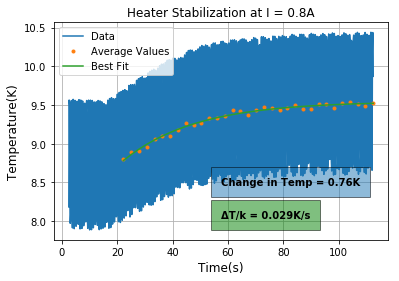

C:\Anaco\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


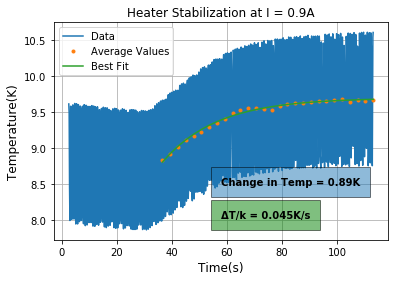

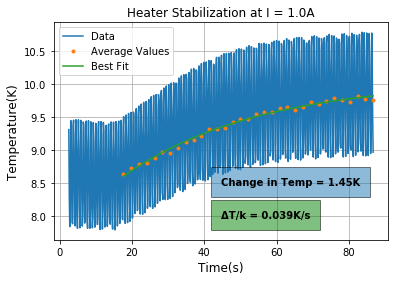

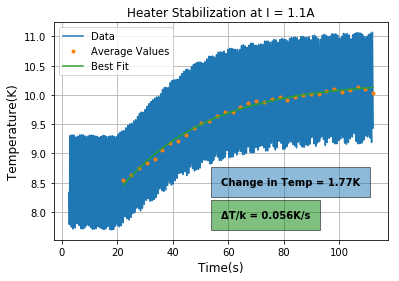

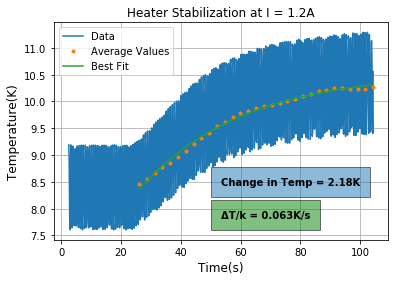

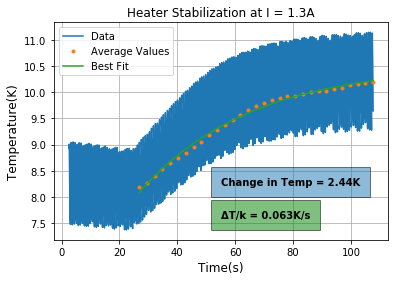

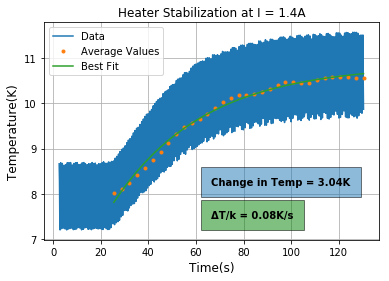

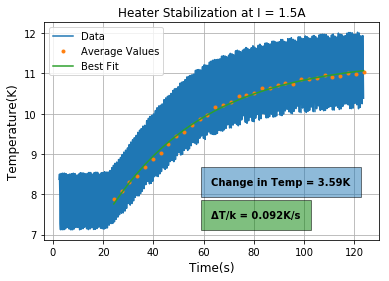

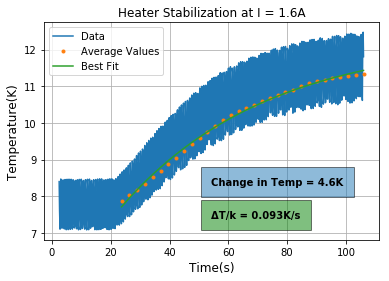

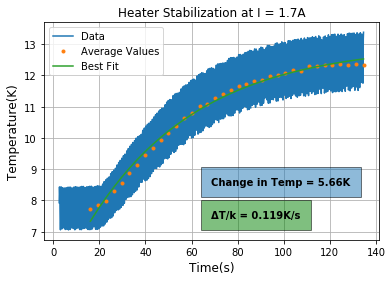

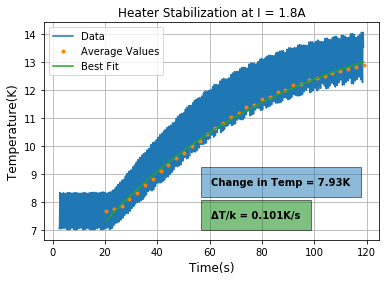

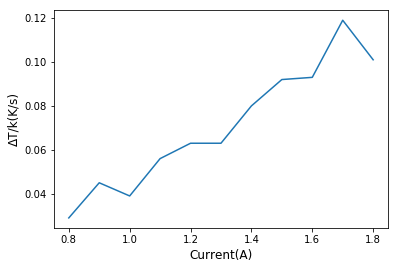

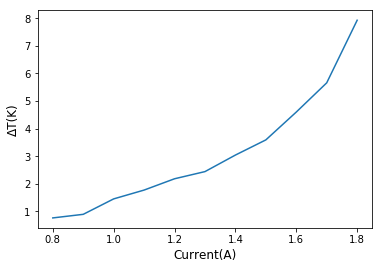

In [30]:
even_bigger_func()

In [10]:
def diff_func(ydata,xdatafit,xdata,avg_values, optimizedParameters,xdatafitsub,exp_func, avg_values_sub):
    xdatafitsub2 = np.linspace(min(xdatafitsub),min(xdatafitsub)+1,500)
    dy_avg = np.zeros(len(xdatafitsub),np.float)
    dy_avg[0:-1] = np.diff(avg_values_sub)/np.diff(xdatafitsub)
    dy_avg[-1] = (avg_values_sub[-1] - avg_values_sub[-2])/(xdatafitsub[-1] - xdatafitsub[-2])
    
    
    dy_exp = np.zeros(len(xdatafitsub),np.float)
    dy_exp[0:-1] = np.diff(exp_func(xdatafitsub,*optimizedParameters))/np.diff(xdatafitsub)
    dy_exp[-1] = (exp_func(xdatafitsub,*optimizedParameters)[-1] - exp_func(xdatafitsub,*optimizedParameters)[-2])/(xdatafitsub[-1] - xdatafitsub[-2])
    
    def dec_exp_func(t,a,b,c,d):
        return d*np.exp((-t-a)/c)+b
    exp_values = [-30,0,10,.05]
    exp_optimizedParameters, pcov = opt.curve_fit(dec_exp_func, xdatafitsub, dy_exp, p0 = exp_values)
    avg_optimizedParameters, pcov = opt.curve_fit(dec_exp_func, xdatafitsub, dy_exp, p0 = exp_values)
    
    sin_wave = 0.78712743*np.cos(9.05626681*xdatafitsub2-(-0.56797045))+8.11012026
    
    xum = np.linspace(min(xdatafitsub),min(xdatafitsub)+1, 468)
 
    plt.plot(xdatafitsub-20,dy_exp, '.')
    plt.plot(xdatafitsub-20, dec_exp_func(xdatafitsub, *exp_optimizedParameters))
    plt.legend(['Data', 'Best Fit'], loc='upper left')
    plt.xlabel('Time(s)', fontsize = 12)
    plt.ylabel('Change in Temp(K/s)', fontsize = 12)
    plt.title('Impulse Response from I=1.50A Step Res')
    plt.show()
    plt.plot(xdatafitsub2-18.8, max(sin_wave)-sin_wave)
    plt.title('Desired Response')
    plt.xlabel('Time(s)', fontsize = 12)
    plt.ylabel('Temperature(K)', fontsize = 12)
    plt.show()
    plt.plot(xum-18.8,((scipy.signal.deconvolve(max(sin_wave)-sin_wave, dec_exp_func(xdatafitsub, *exp_optimizedParameters)))[0]))
    plt.xlabel('Time(s)', fontsize = 12)
    plt.ylabel('Temperature?', fontsize = 12)
    plt.title('Deconvolve')

In [12]:
#funcs-in-a-func
def big_diff_func(textfile):
    xdata, ydata, textfile = load_data_func(textfile)
    avg_values_sub,xdatafit, beginning_subset, xdatafitsub, avg_values= average_func(xdata, ydata, number_of_avg_values=40)
    exp_func, init_values,optimizedParameters = fit_func(avg_values_sub, xdatafit, beginning_subset, xdatafitsub)
    temp_rise_text, k_text = graph_text_func(optimizedParameters, exp_func, xdatafitsub,avg_values_sub)
    graph_func(optimizedParameters,avg_values_sub, xdata, ydata, xdatafitsub, exp_func,textfile)
    diff_func(ydata,xdatafit,xdata,avg_values,optimizedParameters,xdatafitsub,exp_func,avg_values_sub)
    
    

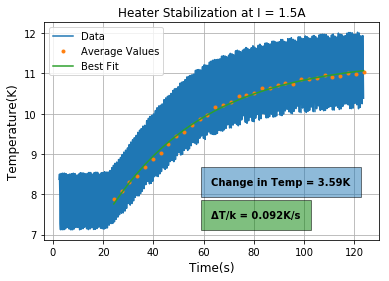

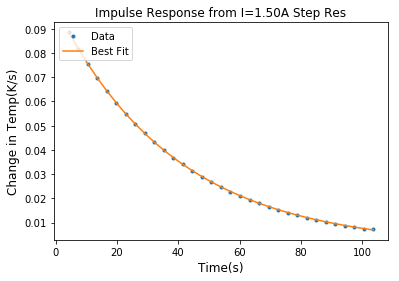

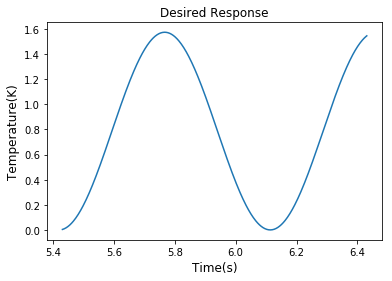

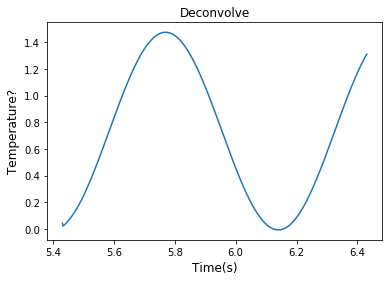

In [31]:
big_diff_func('New 1.5A Current.txt')